In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline
from matplotlib import cm

In [4]:
df = pd.read_csv("database.csv")

In [7]:
df.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [11]:
df.shape

(2795, 48)

In [9]:
df.columns

Index(['Report Number', 'Supplemental Number', 'Accident Year',
       'Accident Date/Time', 'Operator ID', 'Operator Name',
       'Pipeline/Facility Name', 'Pipeline Location', 'Pipeline Type',
       'Liquid Type', 'Liquid Subtype', 'Liquid Name', 'Accident City',
       'Accident County', 'Accident State', 'Accident Latitude',
       'Accident Longitude', 'Cause Category', 'Cause Subcategory',
       'Unintentional Release (Barrels)', 'Intentional Release (Barrels)',
       'Liquid Recovery (Barrels)', 'Net Loss (Barrels)', 'Liquid Ignition',
       'Liquid Explosion', 'Pipeline Shutdown', 'Shutdown Date/Time',
       'Restart Date/Time', 'Public Evacuations', 'Operator Employee Injuries',
       'Operator Contractor Injuries', 'Emergency Responder Injuries',
       'Other Injuries', 'Public Injuries', 'All Injuries',
       'Operator Employee Fatalities', 'Operator Contractor Fatalities',
       'Emergency Responder Fatalities', 'Other Fatalities',
       'Public Fatalities', 'All

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Report Number                         2795 non-null   int64  
 1   Supplemental Number                   2795 non-null   int64  
 2   Accident Year                         2795 non-null   int64  
 3   Accident Date/Time                    2795 non-null   object 
 4   Operator ID                           2795 non-null   int64  
 5   Operator Name                         2795 non-null   object 
 6   Pipeline/Facility Name                2674 non-null   object 
 7   Pipeline Location                     2795 non-null   object 
 8   Pipeline Type                         2777 non-null   object 
 9   Liquid Type                           2795 non-null   object 
 10  Liquid Subtype                        1349 non-null   object 
 11  Liquid Name      

"Just took the sample columns from 33 to 48 and found the records contains about all damage cost details.
There are Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs and Other Costs.

It also has overall cost details which is consolidated cost amount."

    What are types of properties which can be consider for damages?
    how can measure damage cost which is relavant to specfic property damage cost?

In [49]:
df['Property Damage Costs'].value_counts()

0.0           539
1000.0        118
500.0         101
5000.0         88
100.0          83
             ... 
9868173.0       1
24323483.0      1
184000.0        1
40594.0         1
110.0           1
Name: Property Damage Costs, Length: 768, dtype: int64

In [50]:
df['Property Damage Costs'].value_counts().sum()

2788

In [48]:
df['Lost Commodity Costs'].value_counts().sum()

2791

In [23]:
df.head(4).T

,0,1,2,3
Report Number,20100016,20100254,20100038,20100260
Supplemental Number,17305,17331,17747,18574
Accident Year,2010,2010,2010,2010
Accident Date/Time,1/1/2010 7:15 AM,1/4/2010 8:30 AM,1/5/2010 10:30 AM,1/6/2010 7:30 PM
Operator ID,32109,15786,20160,11169
Operator Name,ONEOK NGL PIPELINE LP,PORTLAND PIPELINE CORP,"PETROLOGISTICS OLEFINS, LLC","ENBRIDGE ENERGY, LIMITED PARTNERSHIP"
Pipeline/Facility Name,KINDER MORGAN JCT,24-INCH MAIN LINE,NaN,SUPERIOR TERMINAL
Pipeline Location,ONSHORE,ONSHORE,ONSHORE,ONSHORE
Pipeline Type,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,UNDERGROUND
Liquid Type,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",CRUDE OIL,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",CRUDE OIL


In [54]:
df['except property cost'] = ((df['All Costs']) - (df['Property Damage Costs'])).astype('float64')

In [55]:
df['except property cost']

0         1517.0
1            8.0
2          200.0
3        11340.0
4         9650.0
          ...   
2790     61015.0
2791    105400.0
2792      8050.0
2793     29576.0
2794       200.0
Name: except property cost, Length: 2795, dtype: float64

In [56]:
df['except property cost'].isna().sum()

7

In [29]:
df.head(2).T

,0,1
Report Number,20100016,20100254
Supplemental Number,17305,17331
Accident Year,2010,2010
Accident Date/Time,1/1/2010 7:15 AM,1/4/2010 8:30 AM
Operator ID,32109,15786
Operator Name,ONEOK NGL PIPELINE LP,PORTLAND PIPELINE CORP
Pipeline/Facility Name,KINDER MORGAN JCT,24-INCH MAIN LINE
Pipeline Location,ONSHORE,ONSHORE
Pipeline Type,ABOVEGROUND,ABOVEGROUND
Liquid Type,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",CRUDE OIL


In [57]:
df.loc[df['except property cost'].isna()==False]

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,Shutdown Duration,except property cost
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627,NaN,1517.0
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008,NaN,8.0
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200,NaN,200.0
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540,NaN,11340.0
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650,NaN,9650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,20170015,22020,2016,12/27/2016 8:40 AM,32334,TC OIL PIPELINE OPERATIONS INC,KEYSTONE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,0.0,15.0,0.0,0.0,61000.0,0.0,61015,7.0,61015.0
2791,20170028,22046,2016,12/28/2016 4:20 PM,4906,EXXONMOBIL PIPELINE CO,BRRF - CHOCTAW ETHANE/PROPANE MIX SYSTEM,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,0.0,5400.0,0.0,0.0,0.0,100000.0,105400,NaN,105400.0
2792,20170027,22045,2016,12/29/2016 6:40 AM,39145,ENBRIDGE STORAGE (CUSHING) L.L.C.,CUSHING CENTRAL TERMINAL,ONSHORE,TANK,CRUDE OIL,...,NaN,7000.0,50.0,0.0,5000.0,3000.0,0.0,15050,NaN,8050.0
2793,20170024,22032,2017,1/3/2017 10:00 AM,32147,MARATHON PIPE LINE LLC,MIDLAND STATION,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,11852.0,11.0,0.0,29565.0,0.0,0.0,41428,NaN,29576.0


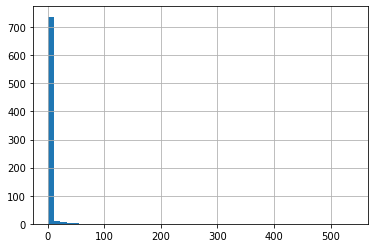

In [40]:
df['Property Damage Costs'].value_counts().hist(bins=50)

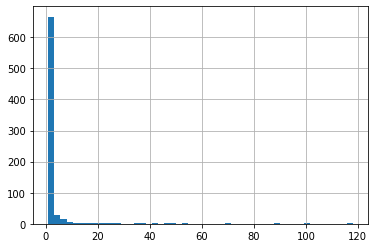

In [43]:
df[df['Property Damage Costs'] > 150]['Property Damage Costs'].value_counts().hist(bins=50)

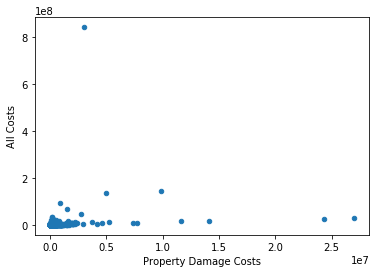

In [41]:
cmap = cm.get_cmap('Reds')
df.plot(x='Property Damage Costs',y='All Costs',kind='scatter')

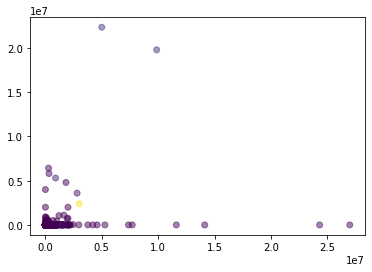

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)
ax.scatter(x=df['Property Damage Costs'],y=df['Other Costs'],c=df['All Costs'],alpha=0.5)

In [45]:
df.head().T

,0,1,2,3,4
Report Number,20100016,20100254,20100038,20100260,20100030
Supplemental Number,17305,17331,17747,18574,16276
Accident Year,2010,2010,2010,2010,2010
Accident Date/Time,1/1/2010 7:15 AM,1/4/2010 8:30 AM,1/5/2010 10:30 AM,1/6/2010 7:30 PM,1/7/2010 1:00 PM
Operator ID,32109,15786,20160,11169,300
Operator Name,ONEOK NGL PIPELINE LP,PORTLAND PIPELINE CORP,"PETROLOGISTICS OLEFINS, LLC","ENBRIDGE ENERGY, LIMITED PARTNERSHIP","PLAINS PIPELINE, L.P."
Pipeline/Facility Name,KINDER MORGAN JCT,24-INCH MAIN LINE,NaN,SUPERIOR TERMINAL,RED RIVER EAST
Pipeline Location,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE
Pipeline Type,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,UNDERGROUND,UNDERGROUND
Liquid Type,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",CRUDE OIL,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",CRUDE OIL,CRUDE OIL
